In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load two images
img1 = cv2.imread('messi.jpg')
img2 = cv2.imread('opencv.png')
# I want to put logo on top-left corner, So I create a ROI


In [3]:
rows,cols,channels = img2.shape
print(rows,cols,channels)

249 202 3


In [25]:
roi = img1[0:rows, 0:cols ]
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()


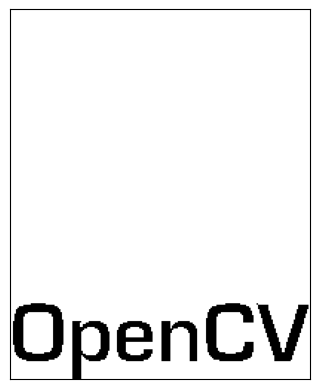

In [19]:
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
plt.imshow(mask, cmap = 'gray')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

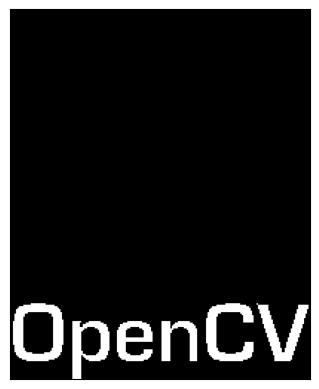

In [22]:
mask_inv = cv2.bitwise_not(mask)
# Now black-out the area of logo in ROI
plt.imshow(mask_inv, cmap = 'gray')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

In [26]:
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
import cv2
import numpy as np
cap = cv2.VideoCapture('tracking1.avi')
while(1):
# Take each frame
    ret, frame = cap.read()
    if ret == False:
        break
# Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
# define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
# Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
# Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)
    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()